### Model Building

* Predictions for training and test set

* Evaluating model performance using mean squared error & root mean squared error

* Feature importance

* Evaluation of the distribution of errors

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [2]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

In [4]:
X_train.head(7)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.000000,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.000000,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.000000,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.000000,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0
5,1229,12.813918,0.588235,0.75,0.418208,0.373596,1.0,1.0,0.000000,0.333333,1.0,0.5,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.000000,0.016393,1.0,0.0,0.3,0.2,0.666667,0.47875,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.272856,0.666667,0.0,0.075244,0.278560,1.0,1.00,1.0,1.0,0.616248,0.0,0.0,0.576053,0.333333,0.0,0.333333,0.5,0.125,0.333333,1.000000,0.416667,1.0,0.333333,0.8,0.8,0.000000,1.000000,0.75,0.741890,0.666667,1.0,1.0,0.000000,0.1316

In [5]:
y_train = X_train['SalePrice']

y_test = X_test['SalePrice']

In [7]:
features = pd.read_csv('selected_features.csv', header = None)

In [8]:
features = [x for x in features[0]]

In [9]:
features = features + ['LotFrontage'] 

In [10]:
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [11]:
X_train = X_train[features]
X_test = X_test[features]

In [12]:
linear_model = Lasso(alpha=0.005, random_state=0)

In [13]:
linear_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Model evaluation

* Make predictions for train and test set


* Determining mean and root mean squared error

In [15]:
predictions = linear_model.predict(X_train)

print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(predictions)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(predictions))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(predictions))))
print()

predictions = linear_model.predict(X_test)

print('test mse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(predictions)))))

print('test rmse: {}'.format(int(sqrt(mean_squared_error(np.exp(y_test), np.exp(predictions))))))

print('test r2: {}'.format(r2_score(np.exp(y_test), np.exp(predictions))))

print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 1087435415
train rmse: 32976
train r2: 0.8258384535431156

test mse: 1405259552
test rmse: 37486
test r2: 0.7955128088451101

Average house price:  163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

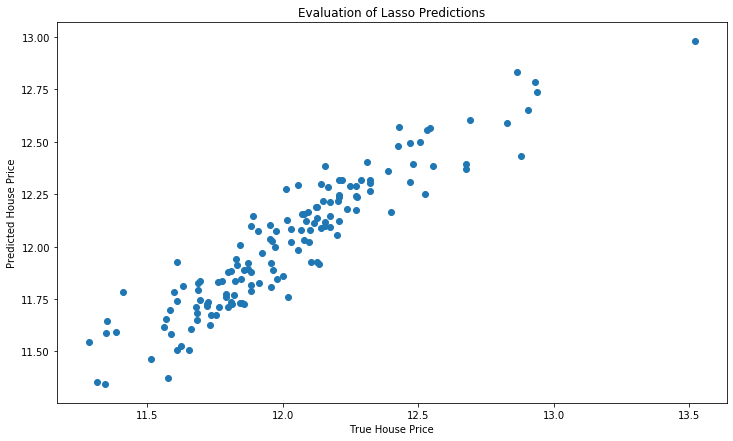

In [17]:
plt.figure(figsize = (12,7))


plt.scatter(y_test, linear_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

Evaluation of the distribution of the errors

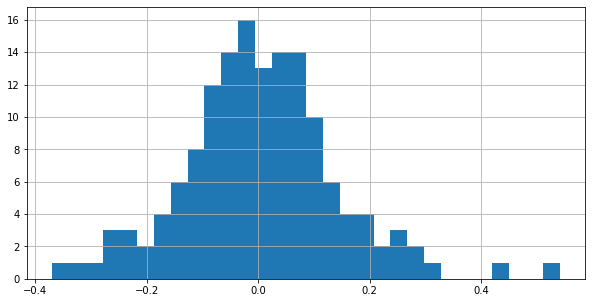

In [20]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

plt.figure(figsize = (10,5))


errors = y_test - linear_model.predict(X_test)
errors.hist(bins=30)
plt.show()

### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

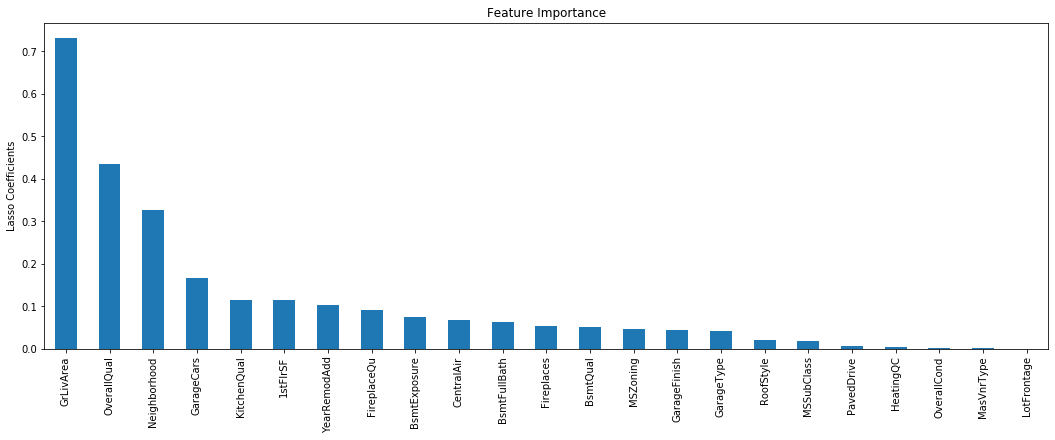

In [21]:
importance = pd.Series(np.abs(linear_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))


plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')